# **Project 32: Intel Image Classifier**

***NumPy*** : *A fundamental package for numerical computing in Python, offering support for large multi-dimensional arrays and matrices.*

***Matplotlib*** : *A comprehensive library for creating static, animated, and interactive visualizations in Python.*

***cv2*** : *A module in OpenCV used for image and video processing, providing tools for computer vision tasks.*

***random*** : *A module in Python used to generate pseudo-random numbers for various distributions and operations.*

***listdir*** : *A function from the os module that returns a list of the names of files and directories in a specified directory.*

***pandas*** : *A powerful data manipulation and analysis library in Python, providing data structures like DataFrame for handling structured data.*

***imread*** : *A function in OpenCV (cv2) used to load an image from a file into a NumPy array.*

**Importing thses libraires for Image Processing and Image Analysis.**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
import random
from os import listdir

**import warnings: Imports the warnings module for handling warning messages.**

**warnings.simplefilter("ignore"): Configures it to ignore all warnings and suppress them from displaying.**

In [ ]:
import warnings

warnings.simplefilter("ignore")

**The code snippet mounts Google Drive to your Google Colab environment, allowing you to access and manage files stored in your Google Drive directly from Colab.**

In [ ]:
from google.colab import drive

drive.mount("/content/drive")

Mounted at /content/drive


**The command !pip install unrar installs the unrar package, which is used to extract files from .rar archives in Python environments like Google Colab.**

In [ ]:
!pip install unrar

**The command extracts the .rar file's contents to the current directory in Google Colab, preserving folder structure.**

In [ ]:
!unrar x "/content/drive/MyDrive/Intel Image Dataset.rar"

**This code snippet generates a 5x5 grid of random images from the "mountain" category in the Intel Image Dataset, displaying each image with its dimensions as labels.**

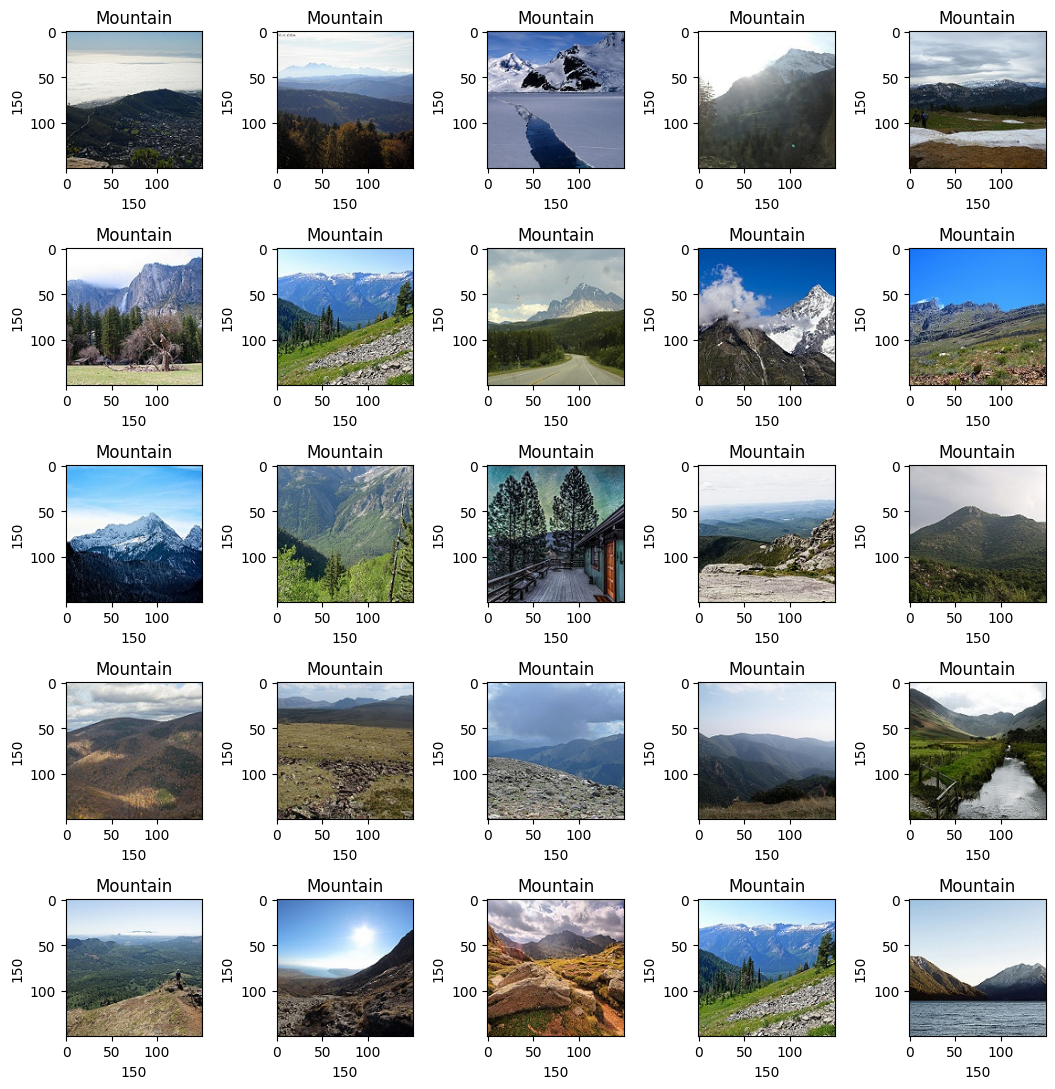

In [ ]:
plt.figure(figsize=(11,11))
path = "/content/Intel Image Dataset/mountain"
for i in range(1,26):
    plt.subplot(5,5,i)
    plt.tight_layout()
    rand_img = imread(path +'/'+ random.choice(sorted(listdir(path))))
    plt.imshow(rand_img)
    plt.title('Mountain')
    plt.xlabel(rand_img.shape[1], fontsize = 10)
    plt.ylabel(rand_img.shape[0], fontsize = 10)

**This code initializes the path to the Intel Image Dataset directory, lists the folders (categories) within that directory, and prepares empty lists to store images and their corresponding labels.**

In [ ]:
dir = "/content/Intel Image Dataset"
root_dir = listdir(dir)
image_list, label_list = [], []

**These tools are commonly used for image preprocessing in machine learning projects, particularly in deep learning models.**

In [ ]:
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array, array_to_img
from PIL import Image

**This code snippet is used to load images from directories, preprocess them, and store them in lists for further use in a machine learning pipeline.**

In [ ]:
for directory in root_dir:
    for files in listdir(f"{dir}/{directory}"):
        image_path = f"{dir}/{directory}/{files}"
        image = Image.open(image_path)
        image = image.resize((150 ,150))
        image = img_to_array(image)
        image_list.append(image)
        label_list.append(directory)

**This code snippet is used to calculate and display the counts of each label in the label_list.**

In [ ]:
label_counts = pd.DataFrame(label_list).value_counts()
label_counts

,count
0,
glacier,553
mountain,525
sea,510
street,501
forest,474
buildings,437


**The variable num_classes calculates the number of unique classes in your dataset.**

In [ ]:
num_classes = len(label_counts)
num_classes

6

**np.array(image_list).shape will return the shape of your image data array.**

**The shape will be in the format (number_of_images, height, width, channels).**

In [ ]:
np.array(image_list).shape

(3000, 150, 150, 3)

**This means it will return a one-dimensional array with the number of elements equal to the total number of images.**

In [ ]:
label_list = np.array(label_list)
label_list.shape

(3000,)

**The train_test_split function from sklearn.model_selection is used to split your dataset into training and testing sets.**

In [ ]:
from sklearn.model_selection import train_test_split

**image_list: The array of images.**

**label_list: The corresponding labels for each image.**

**train_size=0.80: Specifies that 80% of the data will be used for training and the remaining 20% will be used for testing.**

**X_train: Training images.**

**X_test: Testing images.**

**y_train: Labels for the training images.**

**y_test: Labels for the testing images.**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(image_list, label_list, train_size=0.80)

**X_train = np.array(X_train, dtype=np.float16) / 225.0: Converts X_train to a NumPy array with float16 precision and normalizes pixel values.**

**X_test = np.array(X_test, dtype=np.float16) / 225.0: Converts X_test to a NumPy array with float16 precision and normalizes pixel values.**

**X_train = X_train.reshape(-1, 150, 150, 3): Reshapes X_train for model input with dimensions (samples, height, width, channels).**

**X_test = X_test.reshape(-1, 150, 150, 3): Reshapes X_test similarly for model input.**

In [ ]:
X_train = np.array(X_train, dtype=np.float16) / 225.0
X_test = np.array(X_test, dtype=np.float16) / 225.0
X_train = X_train.reshape(-1, 150, 150, 3)
X_test = X_test.reshape(-1, 150, 150, 3)

**lb = LabelBinarizer(): Initializes the LabelBinarizer to convert categorical labels to binary format.**

**y_train = lb.fit_transform(y_train): Fits and transforms the training labels into binary format.**

**y_test = lb.fit_transform(y_test): Fits and transforms the test labels into binary format.**

**print(lb.classes_): Prints the class labels identified by LabelBinarizer.**

In [ ]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.fit_transform(y_test)
print(lb.classes_)

['buildings' 'forest' 'glacier' 'mountain' 'sea' 'street']


**X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, train_size=0.80): Splits the training data into a new training set and validation set, reserving 20% of the data for validation.**

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, train_size = 0.80)

**Conv2D: Convolutional layer to extract features from images.**

**MaxPooling2D: Reduces spatial dimensions by down-sampling.**

**Activation: Applies activation functions to the layers.**

**Flatten: Converts 2D feature maps to 1D vectors.**

**Dropout: Regularization technique to prevent overfitting.**

**Dense: Fully connected layer for classification or regression.**

**LeakyReLU: Activation function allowing small gradients when inputs are negative.**

**Sequential: Linear stack of layers to build a neural network model.**

In [ ]:
from keras.layers import Conv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense
from keras.models import Sequential

**Sequential: A linear stack of layers used to build a neural network model where layers are added one after the other.**

In [ ]:
model = Sequential()

**Convolution and Pooling Layers: The model consists of six convolutional layers, starting with 8 filters and progressively increasing to 192 filters. Each convolutional layer uses a ReLU activation function and is followed by a max-pooling layer to reduce the spatial dimensions.**

**Padding: The convolutional layers use "same" padding, ensuring that the output dimensions match the input dimensions, which helps preserve spatial information across layers.**

**Max Pooling: The max-pooling layers with different pool sizes (2x2 or 3x3) reduce the dimensionality of the feature maps, helping to down-sample the data and make the model more computationally efficient.**

**Flattening: The output from the final convolutional layer is flattened into a single vector, preparing it for the fully connected (Dense) layers that follow.**

**Fully Connected Layers: The model ends with two dense layers, including the final output layer with softmax activation, which produces probabilities for each of the num_classes categories.**

In [ ]:
model.add(Conv2D(8, (3, 3), padding = "same", input_shape = (150, 150, 3), activation = "relu"))
model.add(MaxPooling2D(pool_size = (3, 3)))

model.add(Conv2D(16, (3, 3), padding = "same", activation = "relu"))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(32, (3, 3), padding = "same", activation = "relu"))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, (2, 2), padding = "same", activation = "relu"))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(128, (2, 2), padding = "same", activation = "relu"))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(192, (2, 2), padding = "same", activation = "relu"))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())

model.add(Dense(32, activation = "relu"))

model.add(Dense(num_classes, activation = "softmax"))

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 150, 150, 8)         │             224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 50, 50, 8)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 50, 50, 16)          │           1,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 25, 25, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 25, 25, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 12, 12, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 12, 12, 64)          │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 6, 6, 128)           │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 3, 3, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 3, 3, 192)           │          98,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 1, 1, 192)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 192)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │           6,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │             198 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 152,054 (593.96 KB)

 Trainable params: 152,054 (593.96 KB)

 Non-trainable params: 0 (0.00 B)

**Adam: An optimizer that combines the advantages of two other extensions of stochastic gradient descent (SGD), AdaGrad and RMSProp, by adapting the learning rate for each parameter and maintaining a moving average of the gradients and their squares.**

In [ ]:
from keras.optimizers import Adam

**Loss Function: 'categorical_crossentropy' measures the performance of the model by calculating the difference between the predicted and actual label distributions for multi-class classification tasks.**

**Optimizer: "adam" is an adaptive learning rate optimizer that adjusts the learning rate based on the training data, helping to converge faster and more efficiently.**

**Metrics: ['accuracy'] is used to evaluate the performance of the model by calculating the proportion of correctly classified instances during training and evaluation.**

In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer = "adam", metrics=['accuracy'])

**batch_size=128: Processes 128 samples at a time during model training to update weights.**

**epochs=100: Trains the model for 100 iterations over the entire training dataset.**

**validation_data=(X_val, y_val): Uses the validation dataset to evaluate the model's performance after each epoch.**

In [ ]:
history = model.fit(X_train, y_train, batch_size = 128, epochs = 100, validation_data=(X_val, y_val))

Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 38s 2s/step - accuracy: 0.1913 - loss: 1.7878 - val_accuracy: 0.3479 - val_loss: 1.7526
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 27s 2s/step - accuracy: 0.3338 - loss: 1.6930 - val_accuracy: 0.4333 - val_loss: 1.4508
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 23s 2s/step - accuracy: 0.4228 - loss: 1.4224 - val_accuracy: 0.4521 - val_loss: 1.3447
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.4761 - loss: 1.3289 - val_accuracy: 0.5188 - val_loss: 1.2358
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 29s 2s/step - accuracy: 0.5244 - loss: 1.2033 - val_accuracy: 0.5458 - val_loss: 1.1910
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 26s 2s/step - accuracy: 0.5678 - loss: 1.1335 - val_accuracy: 0.5667 - val_loss: 1.1087
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step - accuracy: 0.6054 - loss: 1.0385 - val_accuracy: 0.5771 - val_loss: 1.0685
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - accuracy: 0.6204 - loss: 0.9858 - val_accuracy: 0.6354 - v

**model.save('Finalized-Model.h5'): Saves the trained Keras model to a file named Finalized-Model.h5 for future use or deployment.**

In [ ]:
model.save('Finalized-Model.h5')

**plt.figure(figsize=(12, 5)): Sets the size of the plot.**

**plt.plot(history.history["accuracy"], color="r"): Plots the training accuracy in red.**

**plt.plot(history.history["val_accuracy"], color="b"): Plots the validation accuracy in blue.**

**plt.title("Model Accuracy"): Adds the title "Model Accuracy" to the plot.**

**plt.xlabel("Accuracy"): Labels the x-axis as "Accuracy."**

**plt.ylabel("Epochs"): Labels the y-axis as "Epochs."**

**plt.legend(["train", "val"]): Adds a legend to differentiate between training and validation accuracy.**

**plt.show(): Displays the plot.**

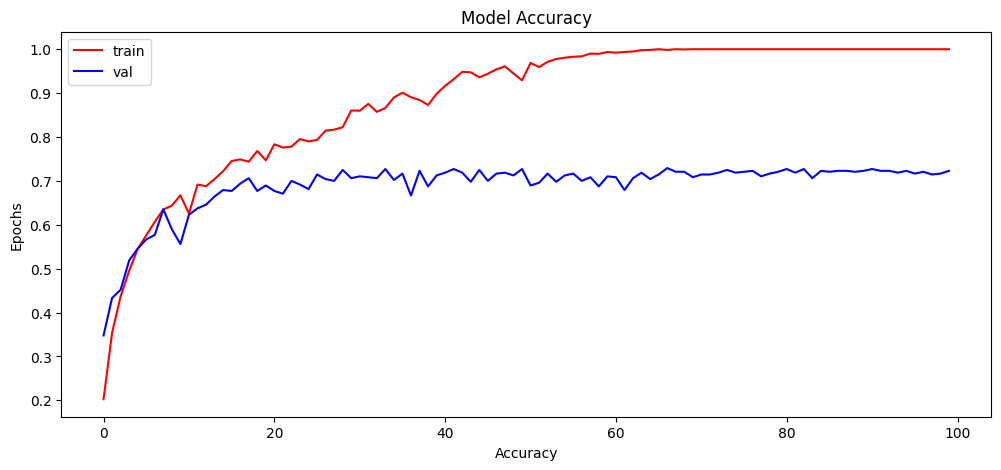

In [ ]:
plt.figure(figsize = (12, 5))
plt.plot(history.history["accuracy"], color = "r")
plt.plot(history.history["val_accuracy"], color = "b")
plt.title("Model Accuracy")
plt.xlabel("Accuracy")
plt.ylabel("Epochs")
plt.legend(["train", "val"])
plt.show()

**plt.figure(figsize=(12, 5)): Sets the size of the plot.**

**plt.plot(history.history["loss"], color="g"): Plots the training loss in green.**

**plt.plot(history.history["val_loss"], color="y"): Plots the validation loss in yellow.**

**plt.title("Model Loss"): Adds the title "Model Loss" to the plot.**

**plt.xlabel("Loss"): Labels the x-axis as "Loss."**

**plt.ylabel("Epochs"): Labels the y-axis as "Epochs."**

**plt.legend(["train", "val"]): Adds a legend to differentiate between training and validation loss.**

**plt.show(): Displays the plot.**

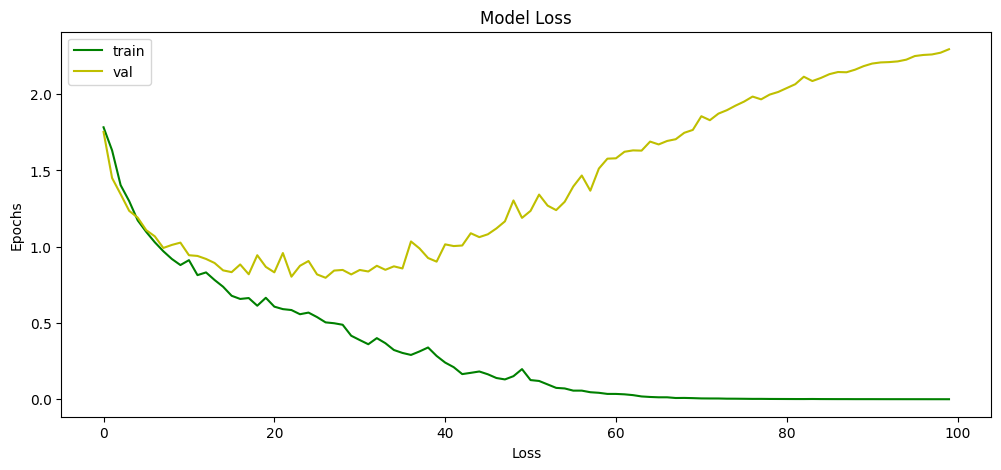

In [ ]:
plt.figure(figsize = (12, 5))
plt.plot(history.history["loss"], color = "g")
plt.plot(history.history["val_loss"], color = "y")
plt.title("Model Loss")
plt.xlabel("Loss")
plt.ylabel("Epochs")
plt.legend(["train", "val"])
plt.show()

**scores = model.evaluate(X_test, y_test): Evaluates the model on the test set, returning the loss and accuracy.**

**print(f"Test Accuracy: ", (scores[1] * 100)): Prints the test accuracy as a percentage.**

In [ ]:
scores = model.evaluate(X_test, y_test)
print(f"Test Accuracy: ", (scores[1] * 100))

19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 162ms/step - accuracy: 0.7530 - loss: 2.0715
Test Accuracy:  74.16666746139526


**y_pred = model.predict(X_test): Generates predictions for the test data using the trained model.**

In [ ]:
y_pred = model.predict(X_test)

19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 119ms/step


**img = array_to_img(X_test[2]): Converts the image data from a NumPy array back to a PIL image format for visualization or further processing.**

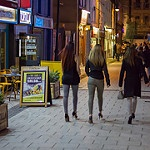

In [ ]:
img = array_to_img(X_test[1])
img

**labels = lb.classes_: Retrieves the class labels from the LabelBinarizer instance used for encoding.**

**print(labels): Displays the array of class labels.**

**print("Originally : ", labels[np.argmax(y_test[2])]): Prints the original class label for the test image at index 2.**

**print("Predicted : ", labels[np.argmax(y_pred[2])]): Prints the predicted class label for the test image at index 2.**

In [ ]:
labels = lb.classes_
print(labels)
print("Originally : ", labels[np.argmax(y_test[1])])
print("Predicted : ", labels[np.argmax(y_pred[1])])

['buildings' 'forest' 'glacier' 'mountain' 'sea' 'street']
Originally :  street
Predicted :  street
